El objetivo del trabajo es analizar partidos de padel para detectar si hay ciertas caracteristicas que expliquen 
el ranking de las parejas y el resultado del set en los partidos. Utilizaré percentilos para comparar los datos 
porque a simple vista no es claro - un valor de puntos por game de 2.7 es muy distinto a 2.2 por ejemplo.
Luego analizaré los jugadores por separado para evaluar y predecir resultados de las parejas

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
import pandas as pd
from statsmodels.formula.api import logit, ols
from scipy.stats import norm

df_eqsk = pd.read_excel("_ml_eqsk.xlsx")

df = pd.read_excel("_medias_snf.xlsx")

df_jug = pd.read_excel("_ml_jug.xlsx")



In [38]:
df.columns



Index(['index', 'puntos x game', 'pts_snf', 'NF', 'NF/W', 'puntos de remate%',
       'remates totales', 'precision remate', 'torneo', 'fase', 'set',
       'resultado'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              680 non-null    object 
 1   puntos x game      680 non-null    float64
 2   pts_snf            680 non-null    float64
 3   NF                 680 non-null    float64
 4   NF/W               680 non-null    float64
 5   puntos de remate%  680 non-null    float64
 6   remates totales    680 non-null    float64
 7   precision remate   680 non-null    int64  
 8   torneo             680 non-null    object 
 9   fase               680 non-null    object 
 10  set                680 non-null    object 
 11  resultado          680 non-null    object 
dtypes: float64(6), int64(1), object(5)
memory usage: 63.9+ KB


In [40]:
df.size

8160

In [41]:
df.shape

(680, 12)

In [42]:
df.head()

,index,puntos x game,pts_snf,NF,NF/W,puntos de remate%,remates totales,precision remate,torneo,fase,set,resultado
0,Momo-Sanyo,3.00,2.14,0.79,0.43,37.10,1.10,72,Dinamarca,Semifinal,general,g
1,Bela-Yanguas,2.55,1.76,0.86,0.61,39.22,0.97,71,Dinamarca,Semifinal,general,p
2,Momo-Sanyo,94.00,93.00,27.00,11.00,62.00,76.00,80,Dinamarca,Semifinal,general,g
3,Bela-Yanguas,47.00,51.00,41.00,31.00,71.00,58.00,77,Dinamarca,Semifinal,general,p
4,Momo-Sanyo,3.00,1.90,0.70,0.39,47.37,1.20,75,Dinamarca,Semifinal,set1,g


In [43]:
round(df.describe(),2)

,puntos x game,pts_snf,NF,NF/W,puntos de remate%,remates totales,precision remate
count,680.00,680.00,680.00,680.00,680.00,680.00,680.00
mean,32.30,30.45,22.86,20.68,46.08,29.54,59.61
std,39.87,38.06,33.19,31.21,27.53,37.88,28.86
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.60,1.80,0.80,0.60,26.32,1.00,43.75
50%,3.33,2.49,1.17,1.42,40.78,1.76,64.00
75%,77.00,68.25,41.00,31.00,62.00,63.00,80.00
max,100.00,100.00,100.00,100.00,100.00,100.00,100.00


In [44]:
#separar columnas de percentilos de los puntos
mask_ptos = (df["puntos x game"]<= 4.1 ) & (df["NF"]<=4.1) & (df["remates totales"]<=4.1) & (df["NF/W"]<=5)
df_pts = df[mask_ptos]
df_pts.shape



(340, 12)

In [45]:
round(df_pts.describe(),2)

,puntos x game,pts_snf,NF,NF/W,puntos de remate%,remates totales,precision remate
count,340.00,340.00,340.00,340.00,340.00,340.00,340.00
mean,2.72,1.86,0.86,0.70,36.39,1.03,65.56
std,0.55,0.44,0.31,0.47,13.53,0.40,15.96
min,1.17,0.50,0.17,0.08,0.00,0.17,0.00
25%,2.33,1.56,0.67,0.42,27.73,0.71,56.00
50%,2.79,1.89,0.86,0.60,36.36,1.00,67.00
75%,3.12,2.17,1.05,0.86,45.45,1.30,75.25
max,4.00,3.00,2.33,4.33,73.33,2.44,100.00


In [46]:
#columnas percentilos
df_perc = df[~mask_ptos]
df_perc.shape

(340, 12)

In [47]:
round(df_perc.describe(),2)

,puntos x game,pts_snf,NF,NF/W,puntos de remate%,remates totales,precision remate
count,340.00,340.00,340.00,340.00,340.00,340.00,340.00
mean,61.89,59.04,44.86,40.67,55.77,58.05,53.67
std,37.79,35.51,35.15,33.91,33.87,35.26,36.65
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,20.00,24.00,10.00,10.00,24.00,19.75,17.00
50%,77.00,68.50,41.00,31.00,60.00,63.00,61.00
75%,97.00,93.00,80.00,71.25,89.00,94.00,88.50
max,100.00,100.00,100.00,100.00,100.00,100.00,100.00


In [48]:
#agrupar a los equipos y sacar su media
df_group = round(df_pts.groupby("index").mean().sort_values(["puntos x game"], ascending=False),2)
df_group

,puntos x game,pts_snf,NF,NF/W,puntos de remate%,remates totales,precision remate
index,,,,,,,
Tap-Coe,3.09,2.16,0.62,0.39,44.45,1.36,71.81
Gal-Leb,2.86,1.92,0.90,0.82,31.22,1.00,58.34
Stupa-Di,2.85,1.98,0.76,0.54,35.23,1.03,65.28
Ivanxo-Rico,2.81,2.06,0.98,0.62,34.28,1.05,66.71
Pincho-Diestro,2.80,1.94,0.82,0.57,32.88,1.02,65.94
Bela-Sanyo,2.78,1.92,1.19,1.00,27.61,1.00,53.50
Lam-Bel,2.77,1.68,0.93,0.81,40.56,1.01,67.22
Momo-Yanguas,2.73,1.79,0.76,0.63,33.46,0.87,73.83
Paquito-Chingotto,2.67,1.72,0.94,0.84,31.20,0.83,63.76


In [49]:
#obtener percentilos del df de los puntos
mean_as = round(df_group.describe(),2)

def percentilos(df, df_mean, lname):
    dicc_cuartiles = {}
    
    for i,n in enumerate(lname):
        lcuartiles = []
        for y in range(7):    
            df1 = df.loc[n]
            cuartil = round(norm.cdf((df1[y] - df_mean.iloc[1][y])/df_mean.iloc[2][y])*100)
            lcuartiles.append(cuartil)
        dicc_cuartiles[n]= lcuartiles
        
    xx = pd.DataFrame(dicc_cuartiles)
    xx = xx.T
    xx = xx.rename({0:"puntos x game",1:"pts_snf", 2:"NF",3:"NF/W",4:"puntos de remate%", 5:"remates totales", 6:"precision remate",}, axis="columns")
    
    return xx
all_name = df_group.index
df_group_perc = percentilos(df_group, mean_as,all_name)
df_group_perc

,puntos x game,pts_snf,NF,NF/W,puntos de remate%,remates totales,precision remate
Tap-Coe,97,95,8,9,85,98,76
Gal-Leb,87,78,48,53,31,64,27
Stupa-Di,86,84,24,19,49,69,53
Ivanxo-Rico,83,90,63,27,44,72,58
Pincho-Diestro,83,80,33,22,38,68,55
Bela-Sanyo,81,78,91,75,18,64,14
Lam-Bel,80,47,54,51,72,66,60
Momo-Yanguas,76,63,24,29,41,41,82
Paquito-Chingotto,70,53,56,55,31,34,47
Coki-Sanz,64,60,33,38,45,62,39


insight: Las primeras 3 parejas del ranking son las que mas puntos hacen por game. Es interesante remarcar que si no le 
contabilizamos los puntos por errores no forzados de los rivales, la pareja que fue ranking 1 por 3 años -Gal-Leb 
disminuye a menos del percentilo 80 los puntos por game, quedando 7ma en esa tabla. La hipotesis es que ser el 1 en el 
ranking afecta el juego del rival y los lleva a realizar mas errores no forzados - puntos en donde no hay mérito, 
solo error de quien los hizo.


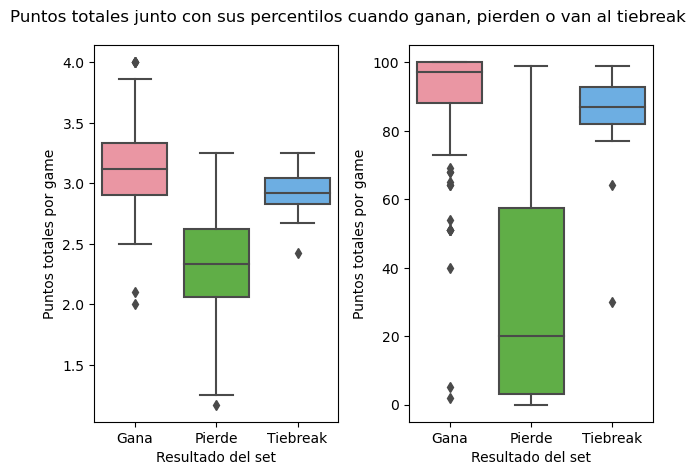

In [50]:
#graficar segun resultado - ganar (g) - perder (p) - tiebreak (tb, que es un empate)
fig,ax = plt.subplots(1,2)
sns.boxplot(x= "resultado", y= "puntos x game", data = df_pts,ax=ax[0])
ax[0].set_ylabel("Puntos totales por game")
ax[0].set_xlabel("Resultado del set")
ax[0].set_xticklabels(["Gana","Pierde","Tiebreak"])
sns.boxplot(x= "resultado", y= "puntos x game", data = df_perc,ax=ax[1])
plt.ylabel("Puntos totales por game")
plt.xlabel("Resultado del set")
ax[1].set_xticklabels(["Gana","Pierde","Tiebreak"])
plt.suptitle("Puntos totales junto con sus percentilos cuando ganan, pierden o van al tiebreak")
plt.tight_layout()

Del grafico boxplot de arriba vemos que para ganar un set habria que estar por encima del percentilo 65
en los puntos por game.
Outliers: como es un deporte en el cual se puede ganar un set con solo hacer todos los puntos cuando sacas y 4 
cuando el rival saca, hay outliers

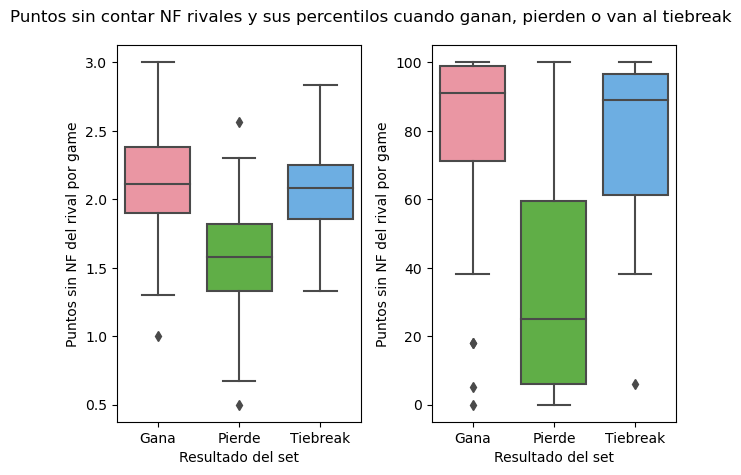

In [51]:
#graficar sin contar los no forzados segun resultado - ganar (g) - perder (p) - tiebreak (tb, que es un empate)
fig,ax = plt.subplots(1,2)
sns.boxplot(x= "resultado", y= "pts_snf", data = df_pts,ax=ax[0])
ax[0].set_ylabel("Puntos sin NF del rival por game")
ax[0].set_xlabel("Resultado del set")
ax[0].set_xticklabels(["Gana","Pierde","Tiebreak"])
sns.boxplot(x= "resultado", y= "pts_snf", data = df_perc,ax=ax[1])
ax[1].set_ylabel("Puntos sin NF del rival por game")
ax[1].set_xlabel("Resultado del set")
ax[1].set_xticklabels(["Gana","Pierde","Tiebreak"])
plt.suptitle("Puntos sin contar NF rivales y sus percentilos cuando ganan, pierden o van al tiebreak")
plt.tight_layout()

Si no tenemos en cuenta los errores no forzados rivales como puntos de la pareja, estas deberian para tener mas probabilidades de ganar superar el percentilo 60 en los puntos por gam

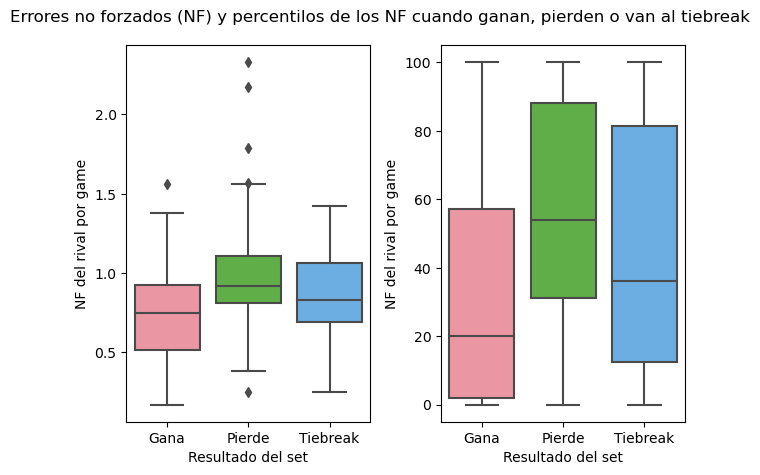

In [52]:
#graficar no forzados segun resultado - ganar (g) - perder (p) - tiebreak (tb, que es un empate)
fig,ax = plt.subplots(1,2)
sns.boxplot(x= "resultado", y= "NF", data = df_pts, ax=ax[0])
ax[0].set_ylabel("NF del rival por game")
ax[0].set_xlabel("Resultado del set")
ax[0].set_xticklabels(["Gana","Pierde","Tiebreak"])
sns.boxplot(x= "resultado", y= "NF", data = df_perc, ax=ax[1])
ax[1].set_ylabel("NF del rival por game")
plt.xlabel("Resultado del set")
plt.suptitle("Errores no forzados (NF) y percentilos de los NF cuando ganan, pierden o van al tiebreak")
ax[1].set_xticklabels(["Gana","Pierde","Tiebreak"])
plt.tight_layout()

Con los errores no forzados la diferencia entre los que ganan y pierden puede no ser tan notoria como con
los puntos por game. 
Cuando la cantidad de errores no forzados supera los 1.5 por game, es muy probable que
esa pareja pierda. Una explicacion es que una pareja que esta en el percentilo 60 en puntos por game, sin contar
los errores no forzados como sus puntos,  podria pasar a estar en el percentilo 90 en puntos por game 
si la pareja rival comete muchos errores no forzados

Evaluacion de las 3 parejas mas dominates

In [53]:
#colores
fondo = "#313332"
verde_lindo = "#46f892"
verde_claro = "#b5fdcd"
scattermedia ="#42424d" #alpha=0.9
text_color = "w"
color_set1 = '#3ff294' # gran verde
color_set2 = '#f4aa51' # amarillo arena naranja
celeste = "#31acce" 
celeste_claro = "#c1e6f0"
azul_fondowpt = '#00ace6'

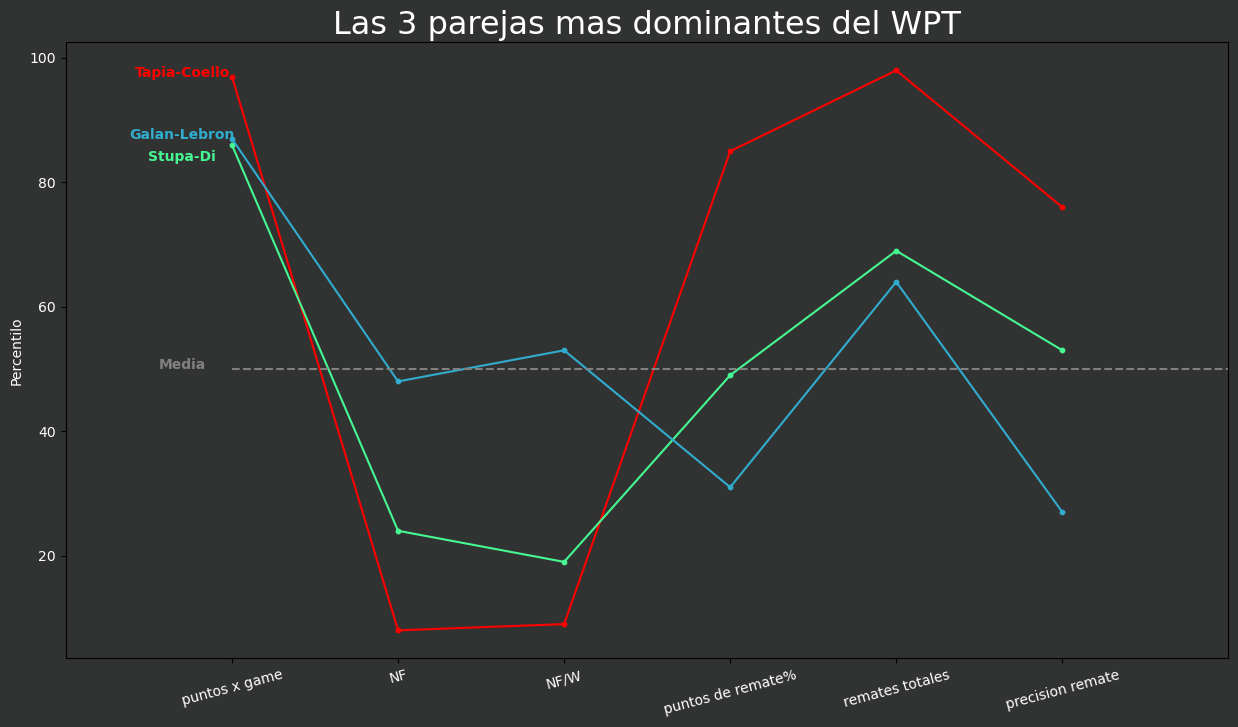

In [54]:
def graf_line(df):
    cols = ["puntos x game","NF","NF/W","puntos de remate%","remates totales","precision remate"]
    fig, ax = plt.subplots(figsize=(15,8))
    fig.set_facecolor(fondo)
    ax.patch.set_facecolor(fondo)
    ax.plot(cols,  df.loc["Tap-Coe",cols], label = "Tap-Coe", color = "red")
    ax.scatter(cols,  df.loc["Tap-Coe",cols],s=10,color = "red")
    ax.plot(cols,  df.loc["Stupa-Di",cols], label = "Stupa-Di", color=verde_lindo)
    ax.scatter(cols,  df.loc["Stupa-Di",cols],s=10, color = verde_lindo)

    #lebron - galan
    ax.plot(cols,  df.loc["Gal-Leb",cols], label = "Gal-Leb", color=celeste)
    ax.scatter(cols,  df.loc["Gal-Leb",cols],s=10, color = celeste)

    ax.text(-0.3, df.loc["Tap-Coe","puntos x game"], "Tapia-Coello", weight='bold', ha='center', color = "red")

    ax.text(-0.3,df.loc["Stupa-Di","puntos x game"]-2.5, "Stupa-Di", weight='bold', ha='center', color=verde_lindo)
    
    ax.text(-0.3,df.loc["Gal-Leb","puntos x game"], "Galan-Lebron", weight='bold', ha='center', color=celeste)

    ax.set_xlim((-1, len(cols)))
    ax.tick_params(axis="x", labelcolor = "w")
    ax.tick_params(axis="y", labelcolor = "w")
    spines = ["top", "right", "left", "bottom"]
    
    x_value = cols.index("puntos x game")  # Obtener el índice del valor "puntos x game" en la lista de columnas
    y_value = 50  # Valor de la línea horizontal
    
    ax.plot([x_value, len(cols)], [y_value, y_value], color='gray', linestyle='--')

    ax.text(-0.3,50, "Media", weight='bold', ha='center', color="gray")

    plt.ylabel("Percentilo", color = "w")
    plt.xticks(rotation = 15)
    plt.title("Las 3 parejas mas dominantes del WPT", color = "w", fontsize = 23)
    plt.show()

graf_line(df_group_perc)

En este grafico de las 3 mejores parejas vemos que las 3 superan el percentilo 83 en puntos por game
La pareja que era numero 1 (Leb-Gal) es la que mas errores no forzados comete, pero tiene el plus de la "hipotesis de los
numero 1", en la cual hemos observado que sus rivales cometen mas errores no forzados contra ellos que en otros partidos.
Sin embargo, la pareja Tap-Coe es la numero 1 hace una semana, invicta, porque ante Gal-Leb ellos no cometen mas 
errores no forzados que su media, por lo cual disminuye notoriamente los puntos que hacen por game la pareja Gal-Leb

Con respecto a os remates, la pareja Tap-Coe tiene una gran ventaja, pero esta no es tal contra los otros 2 mejores
equipos, ya que hay partidos que han rematado menos que el rival y ganan igual. La diferencia la hacen contra los 
equipos que no son del top 3

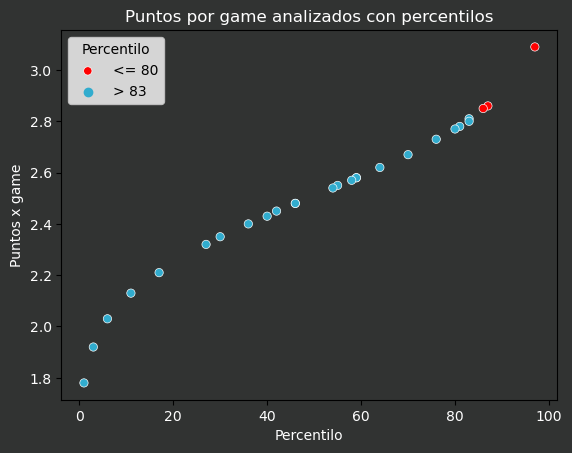

In [55]:
df_group_perc["hue_color"] = df_group_perc["puntos x game"] > 83
fig,ax = plt.subplots()
sns.scatterplot(x= df_group_perc["puntos x game"], y = df_group["puntos x game"], hue = df_group_perc["hue_color"])
fig.set_facecolor(fondo)
ax.patch.set_facecolor(fondo)
sns.set_palette([celeste, "red"])
plt.xlabel("Percentilo", color = "w")
plt.ylabel("Puntos x game",color = "w")
plt.legend(title="Percentilo", labels=["<= 80", "> 83"])
plt.title("Puntos por game analizados con percentilos", color = "w")
ax.tick_params(axis="x", labelcolor = "w")
ax.tick_params(axis="y", labelcolor = "w")
plt.show()

Analisis individual de los jugadores

In [56]:
"""Analisis de jugadores"""
def calculos(df):
    #hacemos el groupby con suma y nuevo df
    df_pts_gan = df.groupby(["nombre"])[["pts_ganados", "games_jug","w_total","NF_total","sm_total","nsmtotal","prec sm%"]].sum()
    

    df_pts_gan = df_pts_gan.assign(pts_xg = round(df_pts_gan.pts_ganados/df_pts_gan.games_jug,2))
    #winner rate, cuantos winners por cada punto
    df_pts_gan = df_pts_gan.assign(w_rate = round(df_pts_gan.w_total/df_pts_gan.pts_ganados*100,2))

    #nf
    df_pts_gan = df_pts_gan.assign(nf = round(df_pts_gan.NF_total/df_pts_gan.games_jug,2))

    #relacion nf/w
    df_pts_gan = df_pts_gan.assign(nf_rate = round(df_pts_gan.NF_total/df_pts_gan.w_total,2))

    #de los puntos cuantos de remate
    df_pts_gan = df_pts_gan.assign(rem_w = round(df_pts_gan.sm_total/df_pts_gan.pts_ganados*100,2))

    #remates totales por game
    df_pts_gan = df_pts_gan.assign(rem_total = round((df_pts_gan.sm_total + df_pts_gan.nsmtotal)/df_pts_gan.games_jug,2))

    #precision
    df_pts_gan = df_pts_gan.assign(rem_prec = round(df_pts_gan.sm_total/(df_pts_gan.sm_total + df_pts_gan.nsmtotal)*100))


    df_stats_only = df_pts_gan.loc[:,"pts_xg":].sort_values(by= "pts_xg", ascending=False)

    df_stats_only = df_stats_only.rename({"pts_xg":"puntos x game", "w_rate":"porc winners", "nf":"NF","nf_rate":"NF/W","rem_w":"puntos de remate%", "rem_total":"remates totales", "rem_prec":"precision remate"}, axis="columns")
    return df_stats_only

all_stats = calculos(df_jug)
all_stats = all_stats.drop("porc winners", axis="columns")
all_stats = all_stats.drop(["Dalbianco","Tolito"]) #jugadores de otro circuito

#agregar lado en la cancha
jizq = df_jug.query("pos == 'izq'")
lizq = jizq["nombre"].unique().tolist()
#all_stats["pos"] = np.where(all_stats.index.isin(lizq),"izq","der")
all_stats

,puntos x game,NF,NF/W,puntos de remate%,remates totales,precision remate
nombre,,,,,,
Paquito,1.67,0.46,0.47,26.97,0.68,67.0
Coello,1.58,0.31,0.34,32.14,0.76,67.0
Stupa,1.54,0.53,0.59,28.14,0.67,65.0
Lamperti,1.53,0.27,0.41,27.37,0.66,63.0
Tapia,1.53,0.33,0.40,30.82,0.64,74.0
Augsburger,1.52,0.81,0.87,42.34,0.89,72.0
Galan,1.52,0.49,0.62,24.55,0.62,61.0
Moyano,1.46,0.56,0.71,25.84,0.52,72.0
Leal,1.44,0.42,0.41,46.77,1.00,67.0


In [57]:
#calcular percentilos de posibles parejas
mean_jug = round(all_stats.describe(),2)

#PERCENTILOS
def percentilos_jug(df, df_mean, lname):
    dicc_cuartiles = {}
    
    for i,n in enumerate(lname):
        lcuartiles = []
        for y in range(6):    
            df1 = df.loc[n]
            if pd.isnull(df1[y]):
                cuartil = 0
            else: 
                cuartil = round(norm.cdf((df1[y] - df_mean.iloc[1][y])/df_mean.iloc[2][y])*100)
            lcuartiles.append(cuartil)
        dicc_cuartiles[n]= lcuartiles
        
    xx = pd.DataFrame(dicc_cuartiles)
    xx = xx.T
    xx = xx.rename({0:"puntos x game", 1:"NF",2:"NF/W",3:"puntos de remate", 4:"remates totales", 5:"precision remate"}, axis="columns")
    return xx



Conformación de parejas 1: tener una pareja que ambos estan por encima del percentilo 50 en puntos por game y por 
    encima del percentilo 55 en NF
Juntar a 2 jugadores que hagan tantos errores no forzados va a llevar a un aumento en los puntos por game de los
contrarios. Entonces, a pesar de tener al jugador que mas hace puntos en el torneo - Galan-, los resultados, probablemente, 
no sean buenos. Hecho que quedó demostrado en el primer torneo que jugaron juntos, perdiendo 6-2 y 6-1 en cuartos de final.
La anterior pareja de Galan, Lebron, estaba en el percentilo 39 en errores no forzados, y como Galan es el que mas
puntos hace no importa que haga menos puntos por game que su actual pareja

In [58]:
"""Analisis de las parejas segun los jugadores que se juntan"""
#pareja formada recientemente: Galan-Sanz
p1 = percentilos_jug(all_stats, mean_jug, ["Galan","Sanz","Lebron","Paquito","Chingotto"])
p1


,puntos x game,NF,NF/W,puntos de remate,remates totales,precision remate
Galan,92,57,34,57,77,41
Sanz,52,87,64,53,62,25
Lebron,50,43,40,51,54,41
Paquito,99,50,21,66,84,67
Chingotto,11,38,83,5,4,96


Conformación de parejas 2: uno que haga la mayoria de los puntos por game y el otro que cometa pocos errores no forzados
    Paquito-Chingotto tienen roles bien definidos, Paquito mete puntos y chingotto permite pocos puntos a los rivales 

In [59]:
#analizar a paquito y chingotto en 2 torneos, su primero y el ultimo juntos
def analisis(df, torneo):
    df_gr = df_jug[df_jug["torneo"]== torneo]
    df_gr_pc = df_gr[((df_gr["nombre"]=="Paquito") | (df_gr["nombre"]== "Chingotto"))]
    df1 = calculos(df_gr_pc)
    return df1

pc_gr = analisis(df_jug,"Granada")
pc_marb = analisis(df_jug,"Marbella")
pc = pd.concat([pc_gr,pc_marb])
pc.drop("porc winners", axis=1, inplace=True)
pc

,puntos x game,NF,NF/W,puntos de remate%,remates totales,precision remate
nombre,,,,,,
Paquito,1.12,0.71,1.50,21.05,0.35,67.0
Chingotto,0.76,0.53,3.00,0.00,0.00,NaN
Paquito,1.88,0.48,0.42,37.10,1.03,68.0
Chingotto,1.00,0.33,1.10,6.06,0.12,50.0


In [69]:

pc_gr = pc_gr.fillna(0)
#pc_gr.drop("porc winners", axis=1, inplace=True)
#pc_marb.drop("porc winners", axis=1, inplace=True)
pc_perc = percentilos_jug(pc_gr, mean_jug, ["Paquito","Chingotto"])
pc_perc.drop("NF/W", axis=1, inplace=True)

pc_mar_perc = percentilos_jug(pc_marb, mean_jug, ["Paquito","Chingotto"])
pc_mar_perc.drop("NF/W", axis=1, inplace=True)


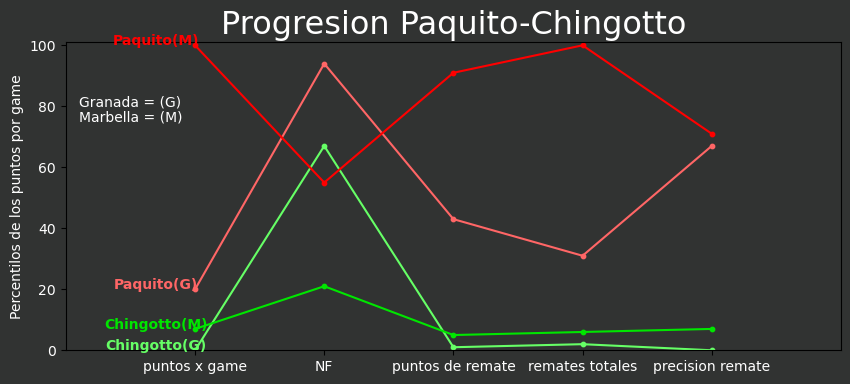

In [70]:
def graf_line(df):
    cols = ["puntos x game","NF","puntos de remate","remates totales","precision remate"]
    cols2= [0,1,2,3,4,5]
    fig, ax = plt.subplots(figsize=(10,4))
    fig.set_facecolor(fondo)
    ax.patch.set_facecolor(fondo)
    ax.plot(cols,  pc_perc.loc["Paquito",cols], label = "Paquito", color = "#ff6666")
    ax.scatter(cols,  pc_perc.loc["Paquito",cols],s=10,color = "#ff6666")
   
    ax.plot(cols,  pc_perc.loc["Chingotto",cols], label = "Chingotto", color = "#66ff66")
    ax.scatter(cols,  pc_perc.loc["Chingotto",cols],s=10,color = "#66ff66")

    ax.text(-0.3, pc_perc.loc["Paquito","puntos x game"], "Paquito(G)", weight='bold', ha='center', color = "#ff6666")
    ax.text(-0.3,pc_perc.loc["Chingotto","puntos x game"], "Chingotto(G)", weight='bold', ha='center', color="#66ff66")
    
    
    ax.plot(cols,  pc_mar_perc.loc["Paquito",cols], label = "Paquito", color = "red")
    ax.scatter(cols,  pc_mar_perc.loc["Paquito",cols],s=10,color = "red")
   
    ax.plot(cols,  pc_mar_perc.loc["Chingotto",cols], label = "Chingotto", color = "#00e600")
    ax.scatter(cols,  pc_mar_perc.loc["Chingotto",cols],s=10,color = "#00e600")
    
    ax.text(-0.3, pc_mar_perc.loc["Paquito","puntos x game"], "Paquito(M)", weight='bold', ha='center', color = "red")
    ax.text(-0.3,pc_mar_perc.loc["Chingotto","puntos x game"], "Chingotto(M)", weight='bold', ha='center', color="#00e600")
    
    ax.text(-0.9,80, "Granada = (G)", color="w")
    ax.text(-0.9,75, "Marbella = (M)", color="w")
   
    ax.set_ylim([0,101])
    ax.set_xlim((-1, len(cols)))
    ax.tick_params(axis="x", labelcolor = "w")
    ax.tick_params(axis="y", labelcolor = "w")
    spines = ["top", "right", "left", "bottom"]
    

    plt.ylabel("Percentilos de los puntos por game", color = "w")
    #plt.xticks(rotation = 10)
    plt.title("Progresion Paquito-Chingotto", color = "w", fontsize = 23)
    plt.savefig('progpc.png')
    plt.show()

graf_line(pc)

De las 2 parejas, la mas beneficiada fue la pareja 2, teniendo a un jugador que esta en el top 3 de los jugadores que mas
puntos hacen por game y a otro que es de los que menos NF hacen por game. Cuando se enfrentaron la pareja 2 ganó 6-2, 6-1. Resultado un poco atípico por la diferencia en games, pero se vió que los errores no forzados hacian daño psicologicamente a la pareja 1 (Galan-Sanz), que se "fueron" del partido